In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
file_path = "E:/adeebs_lab_codes/analysis/big shop sales insight analysis/dataset/MOCK_DATA.csv"  # Ensure the correct file path is used
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,sales,product,quantity,total_price,no_of_items_sold,profits,loss,profits_status,loss_status,sales_date,customer_id,product_id,customer_country,customer_postal_code,category,transaction_id,payment_method
0,1,Peach Halves (canned),567,1584.04,480,1171.96,3669.77,profitable,low,7/12/2021,1,1,Indonesia,NaN,groceries,1,online payment
1,2,Kids' Outdoor Explorer Kit,172,4081.85,591,4425.69,4836.34,loss-making,medium,5/10/2021,2,2,Russia,456144,groceries,2,online payment
2,3,Basketball,114,5656.74,455,352.19,-634.79,break-even,high,6/14/2021,3,3,Indonesia,NaN,clothing,3,online payment
3,4,Electric Wine Opener,151,4175.66,634,2836.24,-1228.76,break-even,high,8/18/2021,4,4,China,NaN,electronics,4,online payment
4,5,Flavored Instant Oatmeal,108,5224.07,847,2043.79,-604.18,break-even,low,1/25/2021,5,5,Peru,NaN,groceries,5,online payment


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sales                 1000 non-null   int64  
 1   product               1000 non-null   object 
 2   quantity              1000 non-null   int64  
 3   total_price           1000 non-null   float64
 4   no_of_items_sold      1000 non-null   int64  
 5   profits               1000 non-null   float64
 6   loss                  1000 non-null   float64
 7   profits_status        1000 non-null   object 
 8   loss_status           1000 non-null   object 
 9   sales_date            1000 non-null   object 
 10  customer_id           1000 non-null   int64  
 11  product_id            1000 non-null   int64  
 12  customer_country      1000 non-null   object 
 13  customer_postal_code  490 non-null    object 
 14  category              1000 non-null   object 
 15  transaction_id        

In [23]:
# Check for missing values
df.isnull().sum()


sales                     0
product                   0
quantity                  0
total_price               0
no_of_items_sold          0
profits                   0
loss                      0
profits_status            0
loss_status               0
sales_date                0
customer_id               0
product_id                0
customer_country          0
customer_postal_code    510
category                  0
transaction_id            0
payment_method            0
dtype: int64

In [24]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [25]:
# Fill missing values with zero or appropriate method
df.fillna(0, inplace=True)

In [26]:
# Display summary statistics
df.describe()

,sales,quantity,total_price,no_of_items_sold,profits,loss,customer_id,product_id,transaction_id
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,503.180000,5041.602240,518.423000,1912.367330,-56.248750,500.500000,500.500000,500.500000
std,288.819436,287.762751,2880.238345,290.740772,1736.244909,2842.183664,288.819436,288.819436,288.819436
min,1.000000,1.000000,4.990000,1.000000,-999.370000,-4989.630000,1.000000,1.000000,1.000000
25%,250.750000,257.750000,2530.770000,272.750000,442.297500,-2553.717500,250.750000,250.750000,250.750000
50%,500.500000,506.500000,5104.000000,518.000000,1860.825000,-14.530000,500.500000,500.500000,500.500000
75%,750.250000,748.250000,7576.185000,767.500000,3418.440000,2310.707500,750.250000,750.250000,750.250000
max,1000.000000,998.000000,9996.990000,1000.000000,4994.340000,4955.940000,1000.000000,1000.000000,1000.000000


AI MODEl

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Encode categorical columns safely
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype(str)  # Convert everything to string first
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Features and target
X = df_encoded.drop(columns=["sales"])
y = df_encoded["sales"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
print("Model Performance on Sales Prediction:")
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Model Performance on Sales Prediction:
R2 Score: 1.0
MSE: 8.75552246336785e-23


🔹 Calculate Key Sales Metrics

In [27]:
# Total Sales, Profit, and Loss
total_sales = df["sales"].sum()
total_profit = df["profits"].sum()
total_loss = df[df["profits"] < 0]["profits"].sum()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Loss: ${total_loss:,.2f}")


Total Sales: $500,500.00
Total Profit: $1,912,367.33
Total Loss: $-86,929.66


🔹 Visualizing Sales Distribution

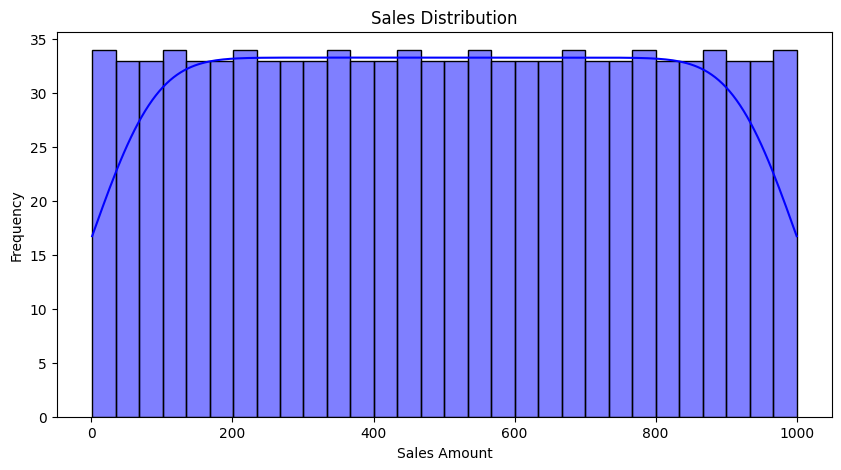

In [28]:
# Histogram for Sales Distribution
plt.figure(figsize=(10,5))
sns.histplot(df["sales"], bins=30, kde=True, color="blue")
plt.title("Sales Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()

🔹 Profit vs. Loss Analysis

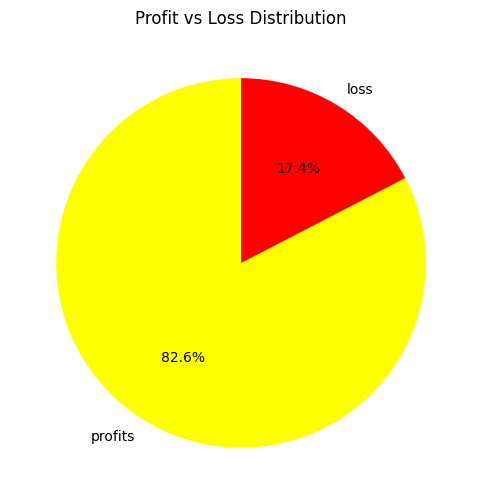

In [48]:
# Categorize transactions
df["profits_status"] = df["profits"].apply(lambda x: "profits" if x > 0 else "loss")

# Pie Chart for Profit vs Loss
plt.figure(figsize=(6,6))
df["profits_status"].value_counts().plot.pie(autopct="%1.1f%%", colors=["yellow", "red"], startangle=90)
plt.title("Profit vs Loss Distribution")
plt.ylabel("")
plt.show()


🔹 Top Selling Products Analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_3404\3004642881.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_selling.index, y=top_selling.values, palette="viridis")


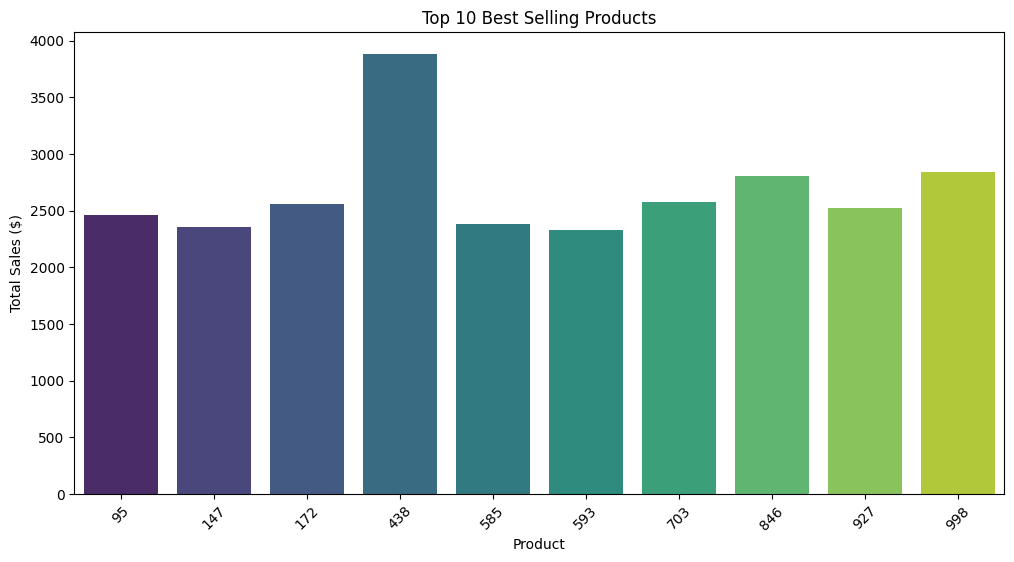

In [43]:
# Top 10 products by sales
top_selling = df.groupby("no_of_items_sold")["product_id"].sum().sort_values(ascending=False).head(10)

# Bar Chart for Top Selling Products
plt.figure(figsize=(12,6))
sns.barplot(x=top_selling.index, y=top_selling.values, palette="viridis")
plt.title("Top 10 Best Selling Products")
plt.xticks(rotation=45)
plt.xlabel("Product")
plt.ylabel("Total Sales ($)")
plt.show()


🔹 Product-wise Profit Analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_3404\1557407734.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_profitable.index, y=top_profitable.values, palette="coolwarm")


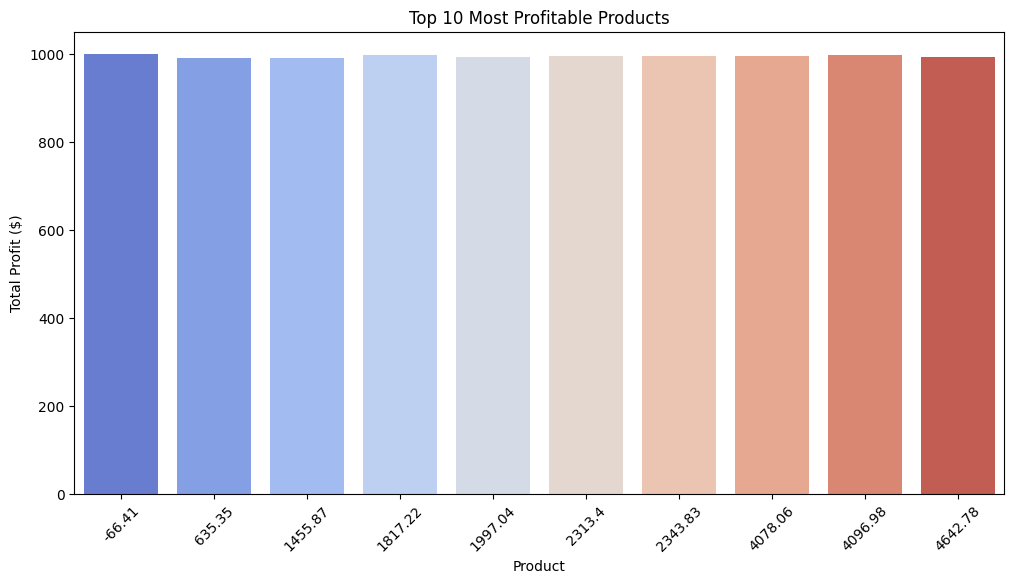

In [45]:
# Top 10 most profitable products
top_profitable = df.groupby("profits")["product_id"].sum().sort_values(ascending=False).head(10)

# Bar Chart for Most Profitable Products
plt.figure(figsize=(12,6))
sns.barplot(x=top_profitable.index, y=top_profitable.values, palette="coolwarm")
plt.title("Top 10 Most Profitable Products")
plt.xticks(rotation=45)
plt.xlabel("Product")
plt.ylabel("Total Profit ($)")
plt.show()


🔹 Region-wise Sales Performance

C:\Users\Admin\AppData\Local\Temp\ipykernel_3404\2057636895.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="Blues_d")


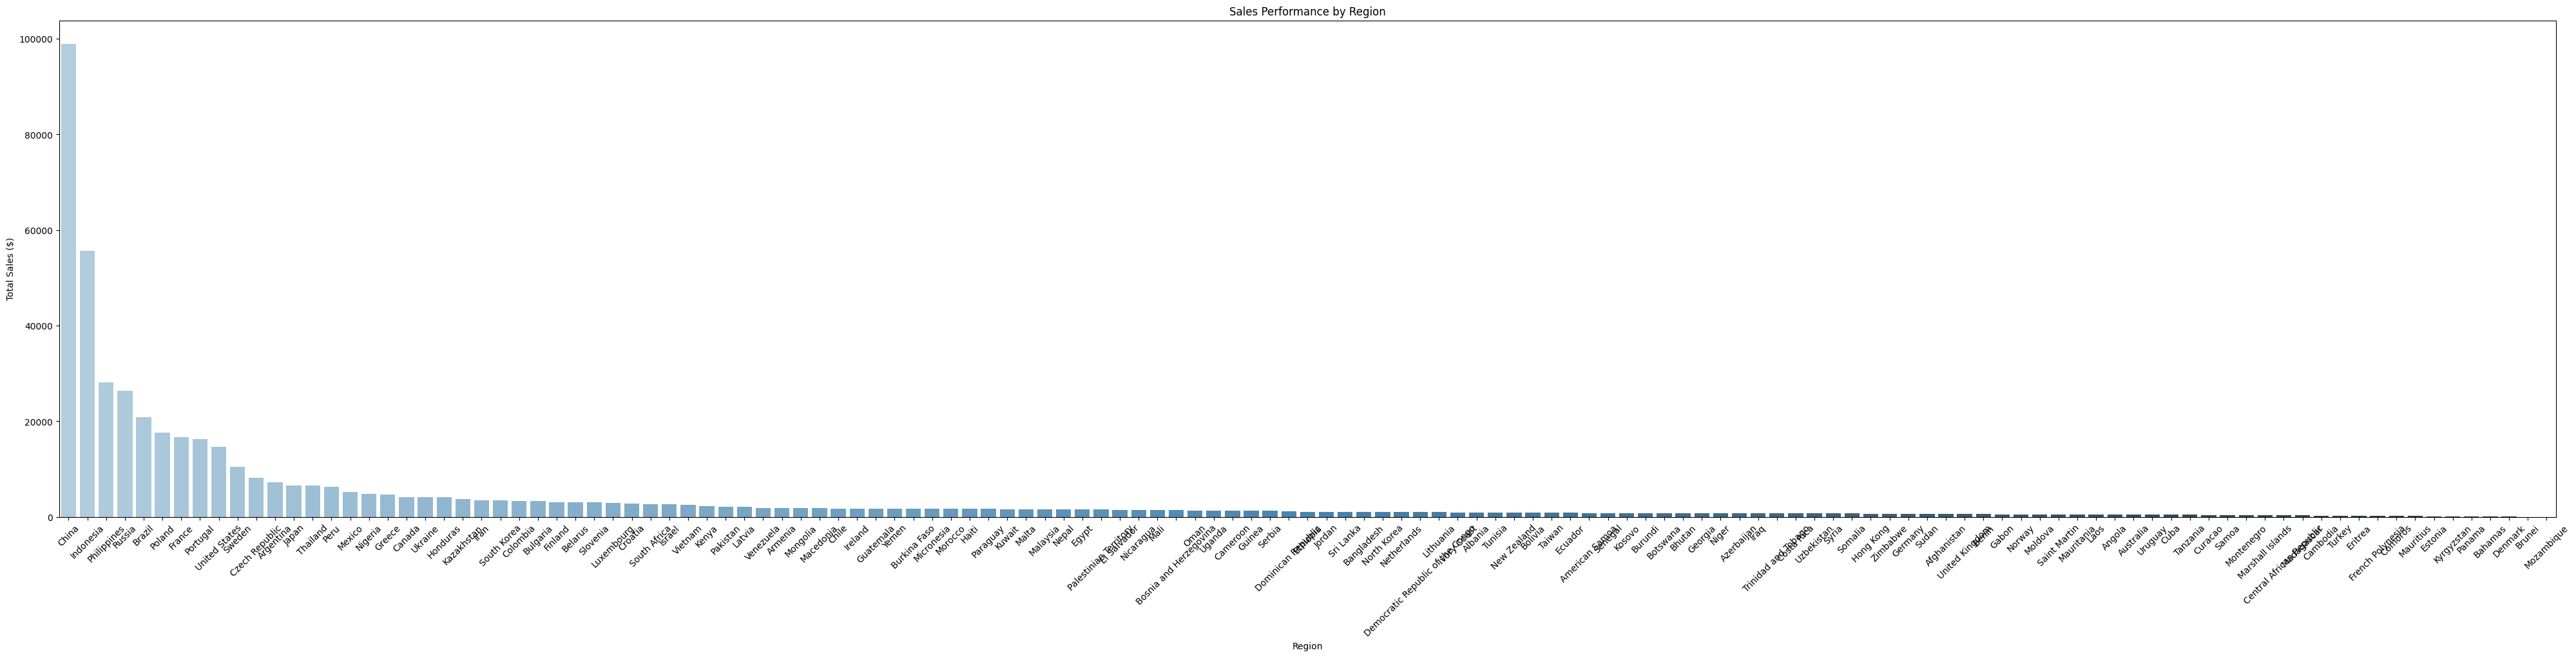

In [32]:
# Grouping Sales by Region
region_sales = df.groupby("customer_country")["sales"].sum().sort_values(ascending=False)

# Bar Chart for Sales by Region
plt.figure(figsize=(50,10))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="Blues_d")
plt.title("Sales Performance by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()


🔹 Correlation Heatmap (Feature Relationships)

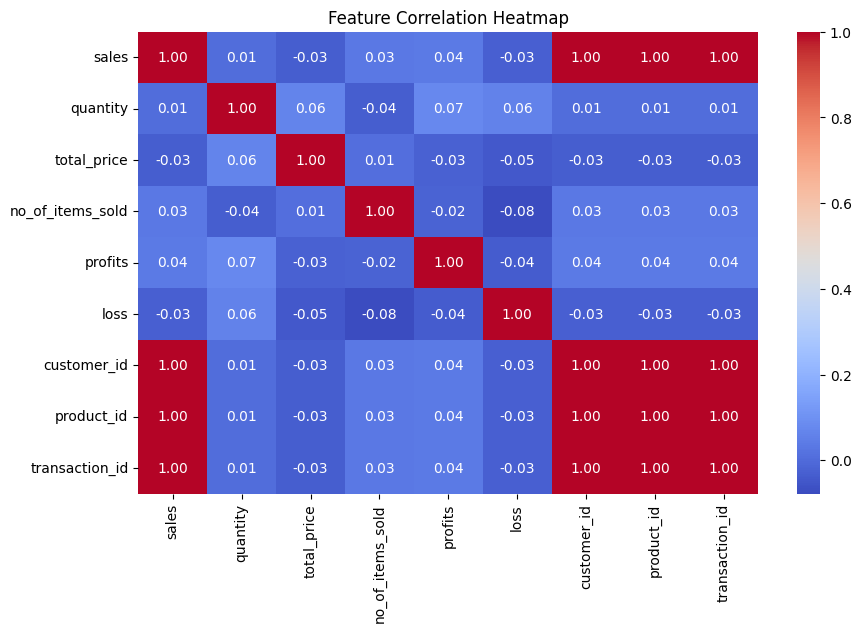

In [33]:
# Selecting numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=["number"])

# Heatmap of Feature Correlations
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
